# **Dimention Reduction**

<font color='#FF15D'> **Task1:**


Use **PCA** to reduce the dataset to 3 dimensions and visualize the results.

Steps:

Standardize the dataset (excluding the Character column).

Apply PCA with n_components=3.

Create a 3D scatter plot of the transformed data.

Add labels (character names) to each point in the plot.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Data
data = {
    'Character': ['ShadowFang', 'IronTusk', 'Arcana', 'ThunderBlaze', 'PhantomStrike', 'BruteHammer'],
    'Speed' : [8,3,4,6,7,2],
    'Strength' : [7,9,2,6,4,10],
    'Defense' : [5,8,3,6,4,9],
    'Magic' : [2,1,9,3,4,1],
    'Range' : [6,4,8,5,9,3],
    'Agility' : [9,2,5,6,8,1]
}
df = pd.DataFrame(data)

In [30]:
#Applying Standardization

df_numeric = df.drop(columns=['Character']) #droping non-numerical column

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns,index=df_numeric.index)

df_normalized.head()

,Speed,Strength,Defense,Magic,Range,Agility
0,1.38873,0.242536,-0.394055,-0.485071,0.078811,1.316976
1,-0.92582,0.970143,1.024544,-0.848875,-0.866921,-1.087937
2,-0.46291,-1.576482,-1.339788,2.061553,1.024544,-0.057260
3,0.46291,-0.121268,0.078811,-0.121268,-0.394055,0.286299
4,0.92582,-0.848875,-0.866921,0.242536,1.497410,0.973417


In [31]:
#Applying Principal Component Analysis
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized),columns=['PC1','PC2','PC3'],index=df_normalized.index)
df_pca.head()

,PC1,PC2,PC3
0,-0.901859,1.787990,-0.265045
1,2.323986,-0.218862,0.212348
2,-2.347454,-2.058233,-0.211582
3,-0.058673,0.488568,-0.420936
4,-2.218756,0.494975,0.636073


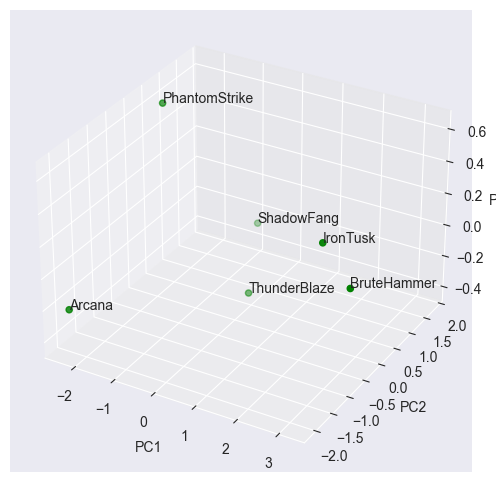

In [54]:
#Creating a 3-D scatter plot of the data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], color='green',label=df['Character'])

# Adding character labels to each point
for i in range(len(df_pca)):
    ax.text(df_pca['PC1'].iloc[i],
            df_pca['PC2'].iloc[i],
            df_pca['PC3'].iloc[i],
            df['Character'].iloc[i])

# Axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

<font color='#FF15D'>**Task2:**


Re-use the same dataset, but this time apply **t-SNE** for dimensionality reduction and visualization.

Steps:

Standardize the dataset (exclude the Character column).

Apply t-SNE with n_components=2 (or 3).

Create a scatter plot of the transformed data.

Label each point with the character name.

In [50]:
from sklearn.manifold import TSNE

In [51]:
#Applying Standardization

df_numeric = df.drop(columns=['Character']) #droping non-numerical column

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns,index=df_numeric.index)

df_normalized.head()

,Speed,Strength,Defense,Magic,Range,Agility
0,1.38873,0.242536,-0.394055,-0.485071,0.078811,1.316976
1,-0.92582,0.970143,1.024544,-0.848875,-0.866921,-1.087937
2,-0.46291,-1.576482,-1.339788,2.061553,1.024544,-0.057260
3,0.46291,-0.121268,0.078811,-0.121268,-0.394055,0.286299
4,0.92582,-0.848875,-0.866921,0.242536,1.497410,0.973417


In [53]:
#Applying T-distributed Stochastic Neighbor Embedding
t_sne = TSNE(n_components=3, perplexity=2)
df_tsne = pd.DataFrame(t_sne.fit_transform(df_normalized),columns=['Dim1','Dim2','Dim3'])
df_tsne.head()

,Dim1,Dim2,Dim3
0,-3.848548,-255.536499,-200.893204
1,167.099365,-81.002220,62.882507
2,-15.287618,122.449493,-163.456223
3,-82.002983,265.502686,249.798553
4,-141.924332,-104.359375,-109.156342


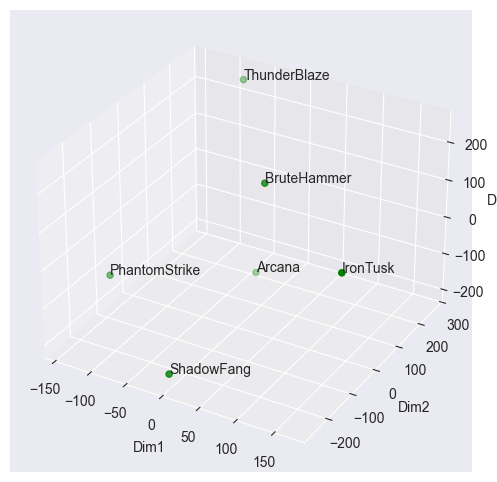

In [56]:
#Creating a 3-D scatter plot of the data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
ax.scatter3D(df_tsne['Dim1'], df_tsne['Dim2'], df_tsne['Dim3'], color='green',label=df['Character'])

# Adding character labels to each point
for i in range(len(df_tsne)):
    ax.text(df_tsne['Dim1'].iloc[i],
            df_tsne['Dim2'].iloc[i],
            df_tsne['Dim3'].iloc[i],
            df['Character'].iloc[i])

# Axis labels
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')

plt.show()